In [7]:
import cv2 # OpenCV
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.color import rgb2gray


In [11]:
def mostrar(imagem, imagem_cinza=False):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  if imagem_cinza:
    plt.imshow(imagem, cmap='gray')
  else:
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 92491  100 92491    0     0   210k      0 --:--:-- --:--:-- --:--:--  210k


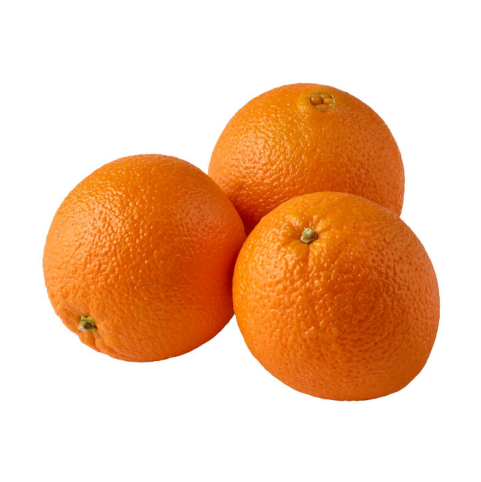

In [85]:
!curl -o laranjas.jpg https://mosaicweb.com.br/images/aula_imagens/laranjas.jpg
img = cv2.imread('laranjas.jpg', cv2.IMREAD_UNCHANGED)
mostrar(img)

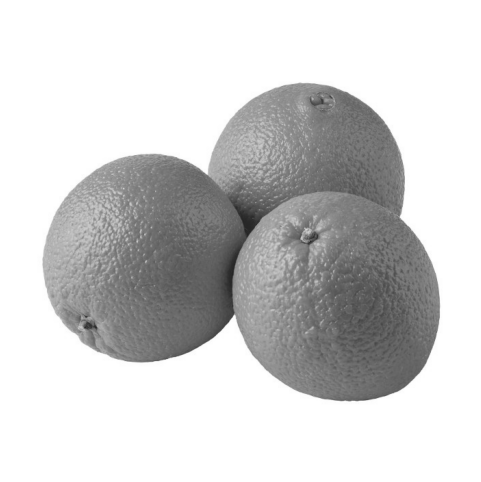

In [86]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar(gray)

In [87]:
altura, largura = img.shape[0], img.shape[1]


In [88]:
img


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [89]:
img_flat = gray.reshape(altura * largura)
print(img_flat)
print(img_flat.shape)

[255 255 255 ... 255 255 255]
(455625,)


In [90]:
media = img_flat.mean()
media

203.2179379972565

In [91]:
num_pixels = len(img_flat)
num_pixels

455625

In [92]:
for i in range(num_pixels):
  if img_flat[i] > media:
    img_flat[i] = 255
  else:
    img_flat[i] = 0
img_flat

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [93]:
seg_regiao = img_flat.reshape(altura, largura)
seg_regiao.shape


(675, 675)

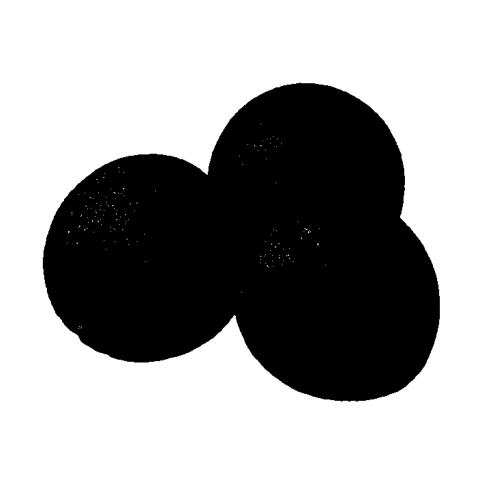

In [94]:
mostrar(seg_regiao)


In [95]:
def flatten_img(img):
  altura, largura = img.shape[0], img.shape[1]
  img_flat = img.reshape(altura * largura)
  return img_flat

In [96]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_flat = flatten_img(gray)
print(img_flat)
print(img_flat.shape)
print('Média: ' + str(img_flat.mean()))

[255 255 255 ... 255 255 255]
(455625,)
Média: 203.2179379972565


In [97]:
gray = rgb2gray(img)
img_flat = flatten_img(gray)
print(img_flat)
print(img_flat.shape)
print('Média: ' + str(img_flat.mean()))

[1. 1. 1. ... 1. 1. 1.]
(455625,)
Média: 0.7434469098353372


In [98]:
def segmenta2regioes(img):
  pixels = flatten_img(img).copy()
  media = pixels.mean()
  for i in range(len(pixels)):
    if pixels[i] > media:
      pixels[i] = 255
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

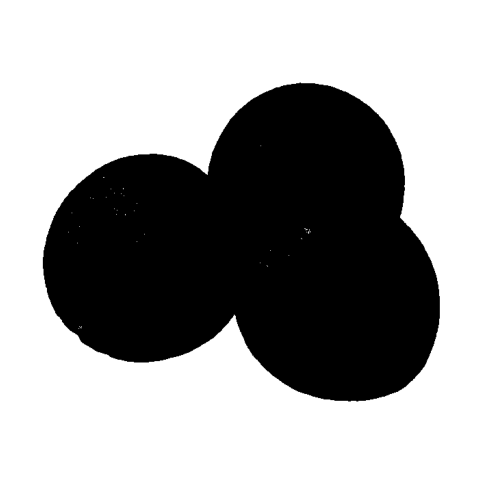

In [99]:
seg_regiao = segmenta2regioes(gray)
seg_regiao = seg_regiao.astype(np.uint8) #
mostrar(seg_regiao)

In [100]:
def segmenta3regioes(img):
  pixels = flatten_img(img).copy()
  for i in range(len(pixels)):
    if pixels[i] > 0.66:
      pixels[i] = 255
    elif pixels[i] > 0.33:
      pixels[i] = 127
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

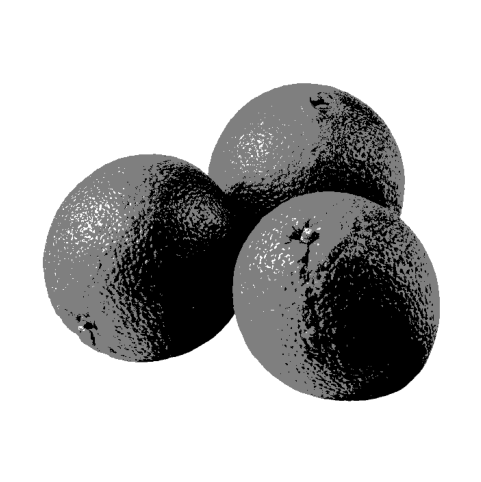

In [101]:
seg_regiao = segmenta3regioes(gray)
mostrar(seg_regiao, imagem_cinza=True)

In [102]:
def segmenta4regioes(img):
  pixels = flatten_img(img).copy()  
  for i in range(len(pixels)):
    if pixels[i] > 0.75:
      pixels[i] = 3
    elif pixels[i] > 0.5:
      pixels[i] = 2
    elif pixels[i] > 0.25:
      pixels[i] = 1
    else:
      pixels[i] = 0
  seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
  return seg_regiao

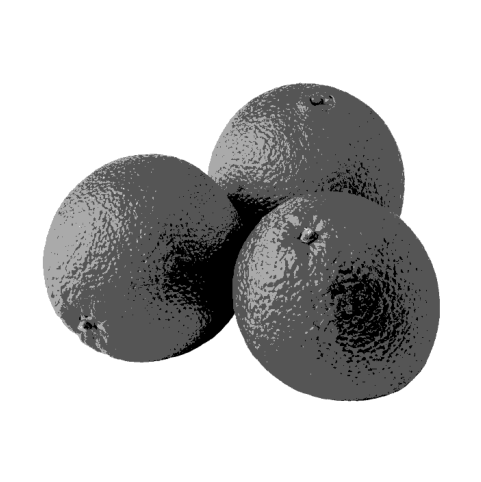

In [103]:
seg_regiao = segmenta4regioes(gray)
mostrar(seg_regiao, imagem_cinza=True)

In [104]:
def segmenta5regioes(img):
    pixels = flatten_img(img).copy()
    for i in range(len(pixels)):
      if pixels[i] > 0.8:
        pixels[i] = 4
      elif pixels[i] > 0.6:
        pixels[i] = 3
      elif pixels[i] > 0.4:
        pixels[i] = 2
      elif pixels[i] > 0.2:
        pixels[i] = 1
      else:
        pixels[i] = 0
    seg_regiao = pixels.reshape(img.shape[0], img.shape[1])
    return seg_regiao

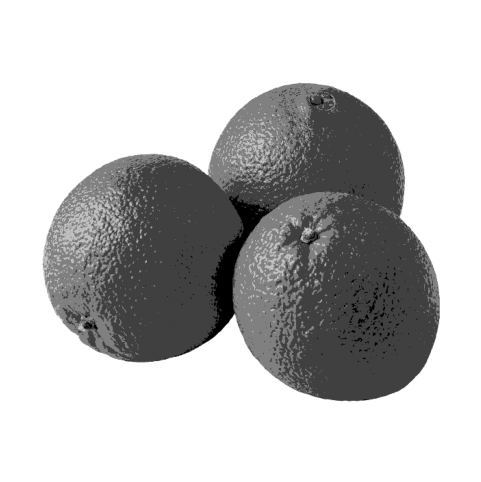

In [105]:
seg_regiao = segmenta5regioes(gray)
mostrar(seg_regiao, imagem_cinza=True)